# RANSAC (Random Sample Consensus)

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

**RANSAC** is useful to deal with data that contains outliers. This algorithms separate the data in **inliers** and **outliers**.

### Steps

1. Sample a small subset of data points.
2. Compute the model.
3. Score the model (number of inliers).

Repeat and choose the model with highest score (more inliers). 

### Example

See all the data points.

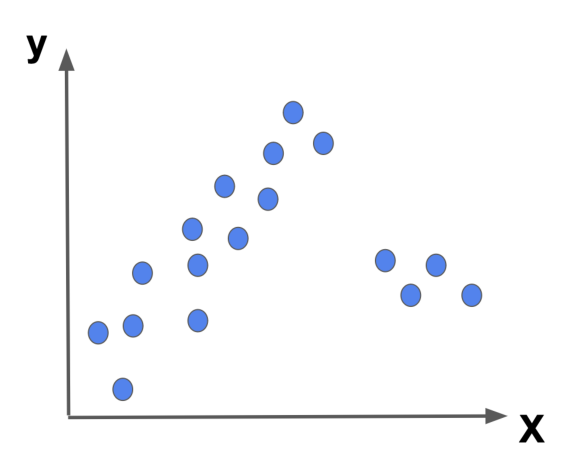

In [4]:
display_img('1.png', 7, 7)

Choose two points radomly and fit a linear regression. Count the inliers. The number of inliers is 6.

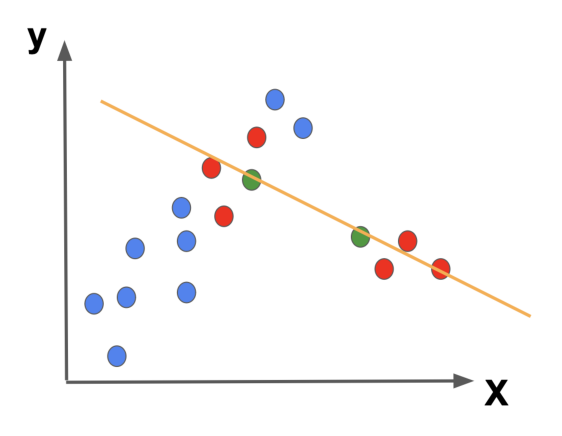

In [5]:
display_img('2.png', 7, 7)

Choose other two points radomly and fit a linear regression. Count the inliers. The number of inliers is 11.

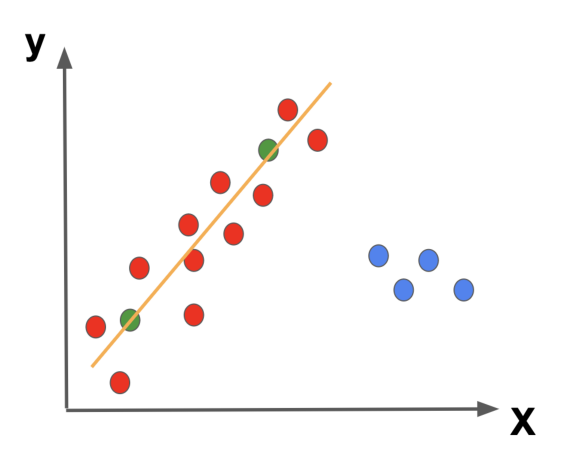

In [6]:
display_img('3.png', 7, 7)

In [7]:
start = time.time()

# 1. Create the dataset

In [8]:
from sklearn import datasets, linear_model

In [9]:
n_samples = 1000
n_outliers = 50

X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

In [10]:
X.shape

(1000, 1)

### i. Add outliers

In [11]:
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

### ii. Plot

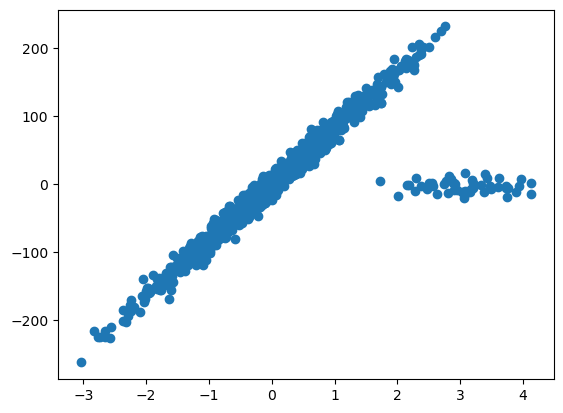

In [12]:
plt.scatter(X[:, 0], y)
plt.show()

# 2. Linear regression

In [13]:
lr = linear_model.LinearRegression()
lr = lr.fit(X, y)

# 3. RANSAC

In [14]:
ransac = linear_model.RANSACRegressor()
ransac = ransac.fit(X, y)

In [15]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# 4. Predict

In [16]:
line_y = lr.predict(X)
line_y_ransac = ransac.predict(X)

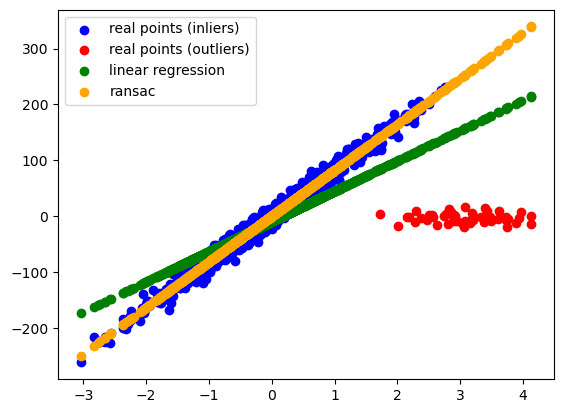

In [17]:
plt.scatter(X[:, 0][inlier_mask], y[inlier_mask], color = 'blue', label = 'real points (inliers)')
plt.scatter(X[:, 0][outlier_mask], y[outlier_mask], color = 'red', label = 'real points (outliers)')
plt.scatter(X[:, 0], line_y, color = 'green', label = 'linear regression')
plt.scatter(X[:, 0], line_y_ransac, color = 'orange', label = 'ransac')
plt.legend()
plt.show()

### Time of execution

In [18]:
end = time.time()

In [19]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
